# Previsão de Vendas - Sales Forecast

Previsão de vendas para rede de drogarias.

Esse é um projeto de regressão.

O conjunto de dados utilizado está disponível <a href='https://www.kaggle.com/c/rossmann-store-sales'>neste link</a>.

A apresentação do projeto está disponível <a href='https://show.zohopublic.com/publish/8ulnq1503aa16c77f43a980e358d241332809'>neste link</a>.

## 1. Entendimento do Negócio

Previsão de vendas ou forecast de vendas, é uma ferramenta utilizada no mundo dos negócios para estabelecer uma projeção alcançável de vendas em um futuro período. 

Nesse sentido, podemos antecipar quantas vendas serão concluídas, quanto de faturamento será alcançado, e até mesmo como será a evolução do funil de vendas, tomando como base vários fatores internos e externos. 

Como se trata de uma previsão, muitas vezes os resultados não são exatamente iguais ao esperado. Porém, o importante é que a diferença entre o realizado e o previsto não seja muito grande, já que a previsão de vendas serve como parâmetro para a maioria das atividades no meio comercial. 

Nesse projeto, nosso cliente é a rede de drogarias Rossmann, uma das maiores da Europa. Nosso principal objetivo é justamente realizar a previsão de vendas para as próximas seis semanas para cada unidade da rede. 

O resultado final será disponibilizado ao final deste notebook.

### 1.1 Dicionário de Dados

Em relação ao conjunto de dados, as seguintes informações foram disponibilizadas:

- Os dados estão em formato estruturado e serão disponibilizados em arquivos "csv".
- Os dias em que as unidades estiveram fechadas serão removidos da análise.
- Apenas unidades com valores de vendas maiores que zero serão consideradas.
- Para as unidades que não possuirem a informação da distância do concorrente mais próximo (*CompetitionDistance*), iremos considerar um valor bem acima dos observados, sinalizando que não há concorrentes próximos a essas unidades.

Além disso, também foi disponibilizado o dicionário de dados:

* **`Store`**: código de identificação de cada unidade da drogaria.
* **`DayOfWeek`**: dia da semana do registro.
* **`Date`**: data do registro.
* **`Sales`**: total de vendas registrado no dia.
* **`Customers`**: número de clientes no dia.
* **`Open`**: indica se a drogaria estava trabalhando no dia:
    - 0 = não. 
    - 1 = sim.
* **`Promo`**: indica se a drogaria estava participando da promoção "normal".
* **`StateHoliday`**: indica se a unidade trabalha durante os feriados:
   - a = unidades abertas em feriados estaduais.
   - b = unidades abertas no feriado de páscoa.
   - c = unidades abertas no feriado de natal. 
   - 0 = unidades abertas somente em dias úteis. 
* **`SchoolHoliday`**: indica se a data do registro era epóca de férias escolares:
    - 0 = não.
    - 1 = sim.
* **`Assortment`**: nível de sortimento de produtos da unidade (a, b, c).
* **`CompetitionDistance`**: distância em metros da unidade do concorrente mais próximo.
* **`CompetitionOpenSinceMonth`**: mês aproximado em que o concorrente mais próximo foi inaugurado.
* **`CompetitionOpenSinceYear`**: ano aproximado em que o concorrente mais próximo foi inaugurado.
* **`Promo2`**: indica se a drogaria estava participando da promoção "estendida":
    - 0 = não. 
    - 1 = sim.
* **`Promo2SinceWeek`**: semana em que a drogaria começou a participar da promoção estendida.
* **`Promo2SinceYear`**: ano em que a drogaria começou a participar da promoção estendida.
* **`PromoInterval`**: descreve os intervalos que a promoção estendida é iniciada.

### 1.2 Estratégia da Solução

Como estratégia para a solução dos problemas apresentados, definimos as seguintes etapas: 

- **1. Entendimento do Negócio:** nesta etapa inicial, o principal objetivo é compreender o problema de negócio e as necessidades do cliente.


- **2. Entendimento dos Dados:** aqui, iremos tratar as principais inconsistências encontradas nos dados, também criaremos hipóteses de negócio e realizaremos uma análise detalhada em cada variável. 


- **3. Engenharia de Atributos:** criaremos novas variáveis a fim de resumir as informações e facilitar o aprendizado dos modelos.


- **4. Pré-Processamento dos Dados:** nosso objetivo é preparar os dados para a aplicação dos modelos preditivos. Técnicas como redimensionamento e seleção das melhores variáveis serão aplicadas nessa etapa.


- **5. Modelagem Preditiva:** criaremos funções para treinar e avaliar o desempenho de três algoritmos de regressão.


- **6. Avaliação dos Modelos**: aqui, iremos comparar o desempenho dos modelos treinados. 


- **7. Conclusões Finais:** por fim, entregaremos o resultado final do projeto.

## 2. Entendimento dos Dados

Vamos iniciar o projeto carregando as bibliotecas necessárias e o conjunto de dados.

### 2.1 Bibliotecas Necessárias

In [1]:
# Filtragem das mensagens de avisos.
import warnings
warnings.filterwarnings('ignore') 

# Manipulação de dados.
import datetime
import math
import numpy as np
import pandas as pd

# Criação de gráficos.
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento dos dados.
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, RobustScaler

# Algoritmos de Machine Learning.
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LinearRegression

# Seleção de variáveis.
from sklearn.feature_selection import f_regression, SelectKBest

# Métricas para avaliação dos modelos.
from pycorrcat.pycorrcat import corr_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Bibliotecas carregadas com sucesso!')

Bibliotecas carregadas com sucesso!


In [2]:
# Versão da linguagem Python.
from platform import python_version
print('Versão da linguagem Python:', python_version())

Versão da linguagem Python: 3.7.3


In [3]:
# Versão dos pacotes.
%reload_ext watermark
%watermark --iversions

matplotlib: 3.5.1
numpy     : 1.21.5
pandas    : 1.3.5
seaborn   : 0.11.2



In [4]:
# Configuração do notebook.

# Plotagens.
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 10
rcParams['lines.linewidth'] = 3

# Estilo dos gráficos.
plt.style.use('ggplot')

# Configuração Dataframe.
pd.set_option('display.max_columns', None)

### 2.2 Tratamento Inicial dos Dados

Nessa etapa, nosso objetivo é realizar uma análise geral nos dados a fim de tratar possíveis inconsistências.

In [5]:
# Carregando os conjuntos de dados.
df_train = pd.read_csv('data/train.csv')
df_store = pd.read_csv('data/store.csv')

# Concatenando os conjuntos.
df = pd.merge(df_train, df_store, how = 'left', on = 'Store')

Criar uma cópia do dataset é uma boa prática para não perdermos o conteúdo original durante a manipulação dos dados.

In [6]:
# Cópia do dataset.
df1 = df

In [7]:
# Visualizando o dataframe.
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
# Dimensão do dataframe.
print('Número de registros: {}'.format(df1.shape[0]))
print('Número de variáveis: {}'.format(df1.shape[1]))

Número de registros: 1017209
Número de variáveis: 18


In [9]:
# Informações do dataframe.
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

Podemos ver que algumas variáveis possuem dados ausentes.

Vamos verificá-los com mais detalhes.

In [10]:
# Valores ausentes.
df1.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

Temos 6 variáveis com registros ausentes, abaixo segue a estratégia de tratamento para cada uma delas:

- **`CompetitionDistance:`** como informado nas premissas do negócio, substituiremos os valores ausentes por valores bem acima dos observados, indicando que não há concorrentes próximos a essas unidades.

Para as variáveis abaixo, iremos utilizar os dados da variável **`Date`** como base para realizar o tratamento:  

- **`CompetitionOpenSinceMonth`** 
- **`CompetitionOpenSinceYear`**
- **`Promo2SinceWeek`**
- **`Promo2SinceYear`**

E por fim:

- **`PromoInterval`**: não será utilizada na análise.

Vamos iniciar o tratamento dos valores ausentes pela variável **`CompetitionDistance`**.

Iremos identificar o valor máximo da variável para definir qual valor escolheremos para realizar a imputação.

In [11]:
# Valor máximo da variável.
df1['CompetitionDistance'].max()

75860.0

O valor máximo da variável é 75.860, sendo assim, para os valores ausentes iremos atribuir o valor 200.000.

In [12]:
# Tratando valores ausentes.
df1['CompetitionDistance'] = df1['CompetitionDistance'].apply(lambda x: 200000.0 if math.isnan(x) else x)

Para o tratamento das próximas variáveis utilizaremos as informações da variável **`Date`**.

Será necessário converter a variável para o tipo *datetime*.

In [13]:
# Conversão da variável.
df1['Date'] = pd.to_datetime(df1['Date'])

Iremos substituir os valores da variável **`CompetitionOpenSinceMonth`**, pelo mês informado na variável **`Date`**.

In [14]:
# Tratando valores ausentes.
df1['CompetitionOpenSinceMonth'] = df1.apply(lambda x: x['Date'].month if math.isnan(x['CompetitionOpenSinceMonth']) 
                                             else x['CompetitionOpenSinceMonth'], axis = 1)

Faremos o mesmo procedimento para as demais variáveis, porém, em vez de utilizar o mês, iremos utilizar a informação correspondente a variável tratada.

In [15]:
# Tratando valores ausentes.

# CompetitionOpenSinceYear.
df1['CompetitionOpenSinceYear'] = df1.apply(lambda x: x['Date'].year if math.isnan(x['CompetitionOpenSinceYear']) 
                                            else x['CompetitionOpenSinceYear'], axis = 1)

# Promo2SinceWeek.
df1['Promo2SinceWeek'] = df1.apply(lambda x: x['Date'].week if math.isnan(x['Promo2SinceWeek']) 
                                   else x['Promo2SinceWeek'], axis = 1)

# Promo2SinceYear.
df1['Promo2SinceYear'] = df1.apply(lambda x: x['Date'].year if math.isnan(x['Promo2SinceYear']) 
                                   else x['Promo2SinceYear'], axis = 1)

Vamos excluir a variável **`PromoInterval`** que não será utilizada.

In [16]:
# Excluindo a variável.
df1 = df1.drop(['PromoInterval'], axis = 1)

In [17]:
# Valores ausentes.
df1.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
dtype: int64

Com isso, finalizamos o tratamento dos dados ausentes.

Agora, vamos filtrar o dataframe, considerando apenas:

- Os dias em que as unidades estiveram abertas.
- Apenas unidades com valores de vendas maiores que 0.

In [18]:
# Filtrando o dataframe.
df1 = df1[(df1['Open'] == 1) & (df1['Sales'] > 0)]

Também podemos excluir as variáveis: 

- **`Open`**: pois agora, os dados já foram filtrados.
- **`DayOfWeek`**: pois utilizaremos a variável **`Date`**.

In [19]:
# Excluindo as variáveis.
df1 = df1.drop(['Open', 
                'DayOfWeek'], axis = 1)

Realizamos uma análise geral nos dados tratando as principais inconsistências observadas, agora, partiremos para uma análise mais detalhada.

### 2.3 Análise Exploratória

Baseado no dicionário de dados, vamos separar as variáveis.

In [20]:
# Variáveis do dataframe.
df1.columns

Index(['Store', 'Date', 'Sales', 'Customers', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear'],
      dtype='object')

In [21]:
# Variável de identificação das unidades.
store = ['Store']

In [22]:
# Variável de datas.
date = ['Date']

In [23]:
# Variáveis numéricas.
nums = ['Sales',
        'Customers',
        'CompetitionDistance',
        'Promo2SinceWeek']

In [24]:
# Variáveis categóricas.
cats = ['Promo',
        'StateHoliday',
        'SchoolHoliday',
        'StoreType',
        'Assortment',
        'CompetitionOpenSinceMonth',
        'CompetitionOpenSinceYear',
        'Promo2',
        'Promo2SinceYear']

#### 2.3.1 Variável de Identificação das Unidades.

In [25]:
# Quantidade de registros.
len(df1['Store'].unique())

1115

Após o tratamento inicial, temos 1115 unidades presentes no conjunto de dados.

#### 2.3.2 Variável de Datas.

In [26]:
# Datas do conjunto de dados.
print('Data início: {}'.format(df1['Date'].min()))
print('Data final: {}'.format(df1['Date'].max()))

Data início: 2013-01-01 00:00:00
Data final: 2015-07-31 00:00:00


#### 2.3.3 Variáveis Numéricas

In [27]:
# Estatísticas das variáveis.
df1[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,844338.0,6955.959134,3103.815515,46.0,4859.0,6369.0,8360.0,41551.0
Customers,844338.0,762.777166,401.194153,8.0,519.0,676.0,893.0,7388.0
CompetitionDistance,844338.0,5961.827515,12592.181107,20.0,710.0,2330.0,6910.0,200000.0
Promo2SinceWeek,844338.0,23.629083,14.288315,1.0,12.0,22.0,37.0,52.0


- As variáveis **`Sales`**, **`Customers`** e **`Promo2SinceWeek`** parecem ter uma distribuição mais simétrica (média e mediana não são muito diferentes).

- A variável **`CompetitionDistance`** parece estar inclinada para a direita (média maior do que a mediana).

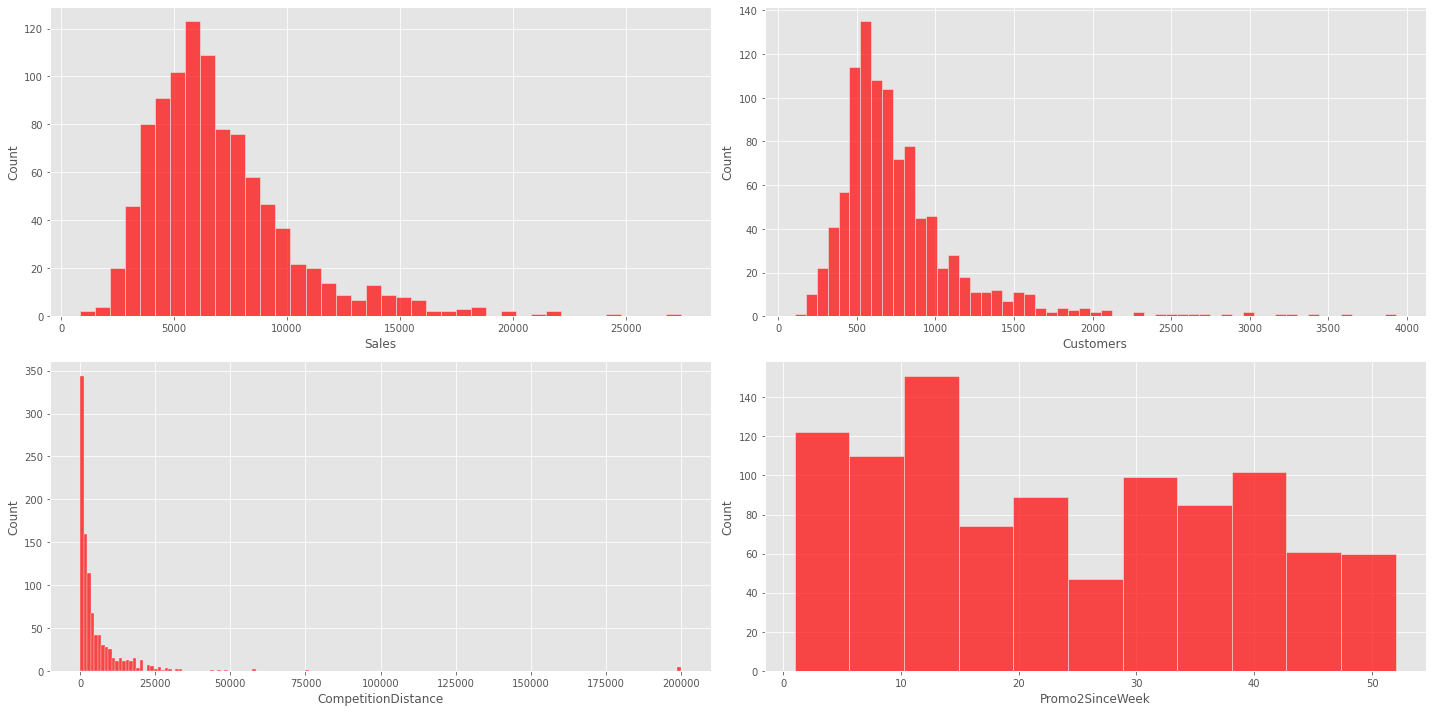

In [28]:
# Histogramas das variáveis.

# Amostra dos dados.
df_sample = df1.sample(1000, random_state = 42)

# Redefinindo a área de plotagem.
plt.figure(figsize = (20, 10))

# Especificando as variáveis.
features = nums

# Plotagem.
for i in range(0, len(nums)):
    plt.subplot(2, 2, i + 1)
    sns.histplot(x = df_sample[features[i]],
                 color = 'r', alpha = 0.7)
    plt.xlabel(features[i])
    plt.tight_layout()

#### 2.3.4 Variáveis Categóricas

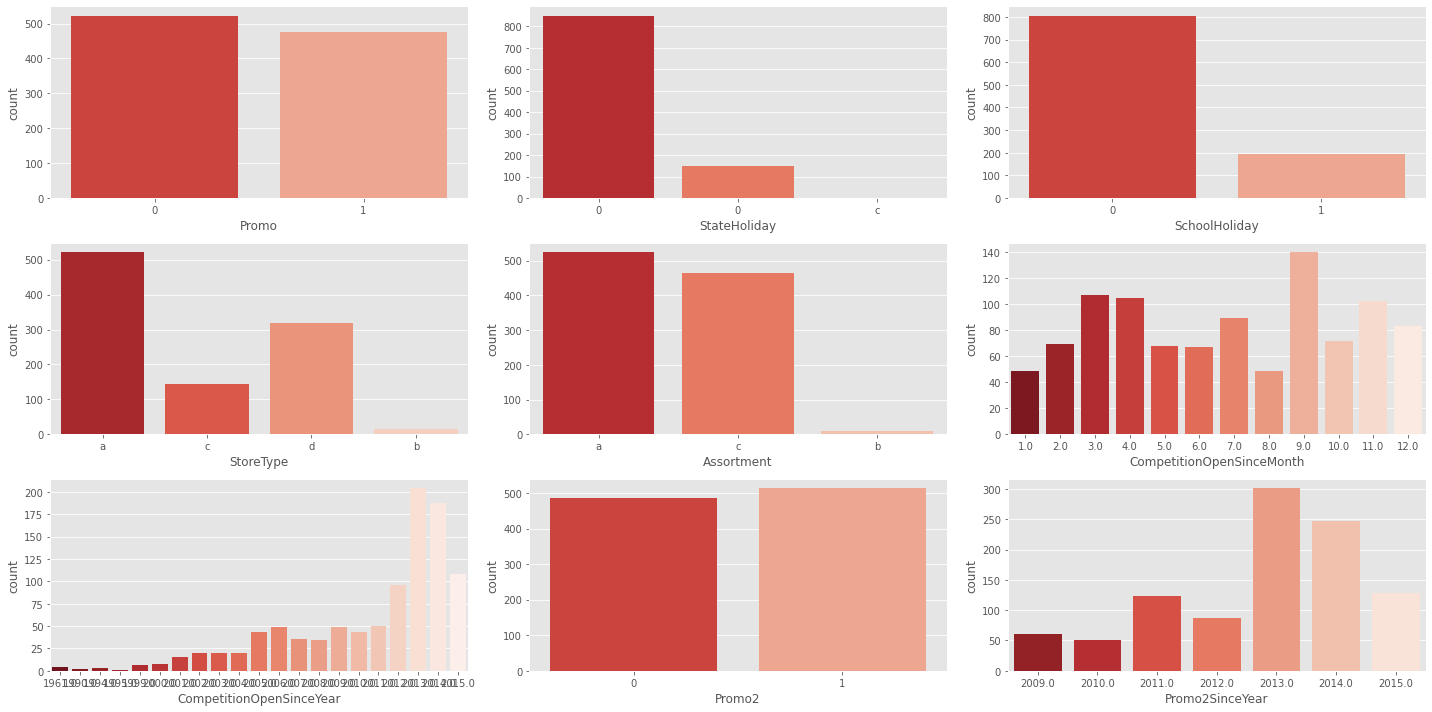

In [29]:
# Plotagem das variáveis.

# Redefinindo a área de plotagem.
plt.figure(figsize = (20, 10))

# Plotagem.
for i in range(0, len(cats)):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x = df_sample[cats[i]], 
                  palette = 'Reds_r')
    plt.tight_layout()

#### 2.3.5 Hipóteses de Negócio

Agora que entendemos o que as variável representam, vamos criar algumas hipóteses de négocio.

- **H1.** As unidades deveriam vender mais depois do dia 10 de cada mês.
- **H2.** As unidades deveriam vender menos aos fins de semana.
- **H3.** As unidades deveriam vender mais no segundo semestre do ano.
- **H4.** As unidades deveriam vender mais ao longo dos anos.
- **H5.** As unidades com promoções estendidas deveriam vender mais.
- **H6.** As unidades abertas durante o feriado de natal deveriam vender mais.
- **H7.** As unidades deveriam vender menos durante os feriados escolares.
- **H8.** As unidades com maior sortimento de produtos deveriam vender mais.
- **H9.** As unidades com concorrentes mais próximos deveriam vender menos.
- **H10.** As unidades com concorrentes à mais tempo deveriam vendem mais.
- **H11.** As unidades com promoções ativas por mais tempo deveriam vender mais.

Para responder as hipóteses que envolvem datas, teremos que "desmembrar" a variável **`Date`**.

In [30]:
# Dia.
df1['Day'] = df1['Date'].dt.day

# Mês.
df1['Month'] = df1['Date'].dt.month

# Ano.
df1['Year'] = df1['Date'].dt.year

# Dia da semana.
df1['WeekDay'] = df1['Date'].dt.dayofweek

# Semana do ano.
df1['WeekYear'] = df1['Date'].dt.weekofyear

# Ano e mês.
df1['YearMonth'] = df1['Date'].dt.strftime('%Y-%m')

In [31]:
# Visualizando as variáveis.
df1[['Date', 
     'Day', 
     'Month', 
     'Year', 
     'WeekDay', 
     'WeekYear', 
     'YearMonth']].head()

,Date,Day,Month,Year,WeekDay,WeekYear,YearMonth
0,2015-07-31,31,7,2015,4,31,2015-07
1,2015-07-31,31,7,2015,4,31,2015-07
2,2015-07-31,31,7,2015,4,31,2015-07
3,2015-07-31,31,7,2015,4,31,2015-07
4,2015-07-31,31,7,2015,4,31,2015-07


Com as informações separadas, podemos responder as primeiras hipotéses.

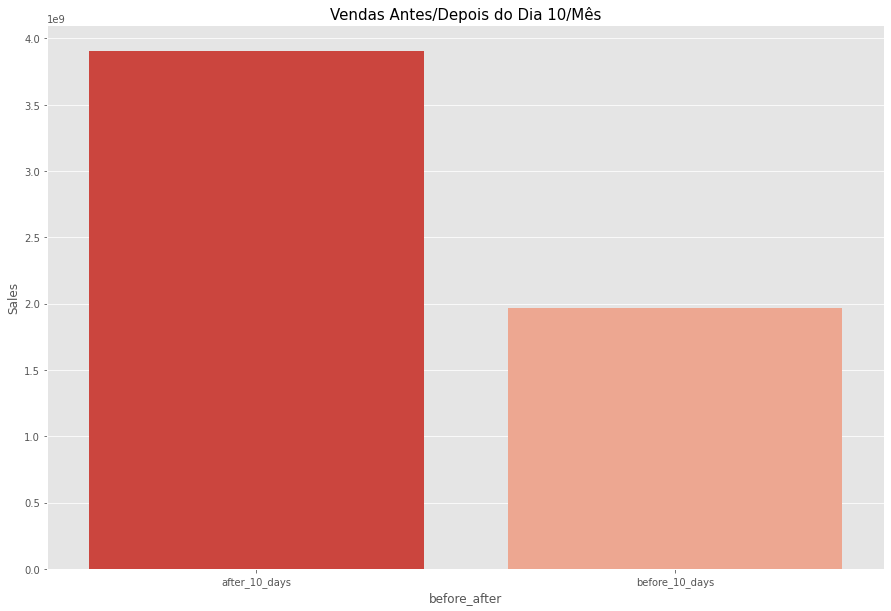

In [32]:
# Hipótese 1.

# Preparação dos dados.
aux1 = df1[['Day', 'Sales']].groupby('Day').sum().reset_index()
aux1['before_after'] = aux1['Day'].apply(lambda x: 'before_10_days' if x <= 10 else 'after_10_days')
aux2 = aux1[['before_after', 'Sales']].groupby('before_after').sum().reset_index()

# Plotagem.
p1 = sns.barplot(x = 'before_after', 
                 y = 'Sales', 
                 data = aux2, 
                 palette = 'Reds_r')
p1.set_title('Vendas Antes/Depois do Dia 10/Mês', size = 15);

Hipótese 1:

- **H1.** As unidades deveriam vender mais depois do dia 10 de cada mês.
    - Verdadeiro, as unidades vendem mais após o dia 10 de cada mês.

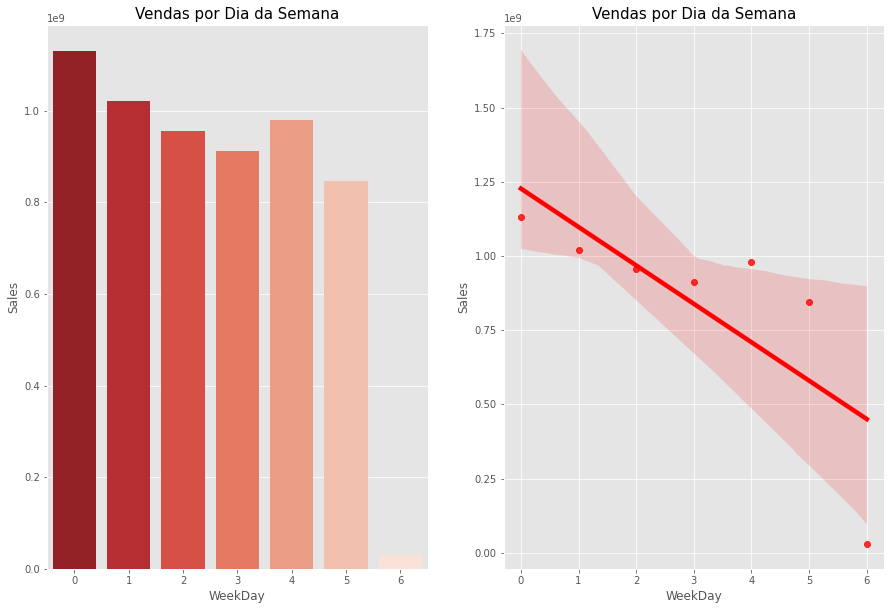

In [33]:
# Hipótese 2.

# Preparação dos dados.
aux1 = df1[['WeekDay', 'Sales']].groupby('WeekDay').sum().reset_index()

# Área de plotagem.
fig, (axis1, axis2) = plt.subplots(1, 2)

# Plotagem 1.
p1 = sns.barplot(x = 'WeekDay', 
                 y = 'Sales', 
                 data = aux1, 
                 palette = 'Reds_r', 
                 ax = axis1)
p1.set_title('Vendas por Dia da Semana', size = 15);

# Plotagem 2.
p2 = sns.regplot(x = 'WeekDay', 
                 y = 'Sales', 
                 data = aux1, 
                 color = 'r', 
                 ax = axis2)
p2.set_title('Vendas por Dia da Semana', size = 15);

Hipótese 2:

- **H2.** As unidades deveriam vender menos aos fins de semana.
    - Verdadeiro, podemos observar o baixo número de vendas nos dias 5 e 6 (sábado e domingo).

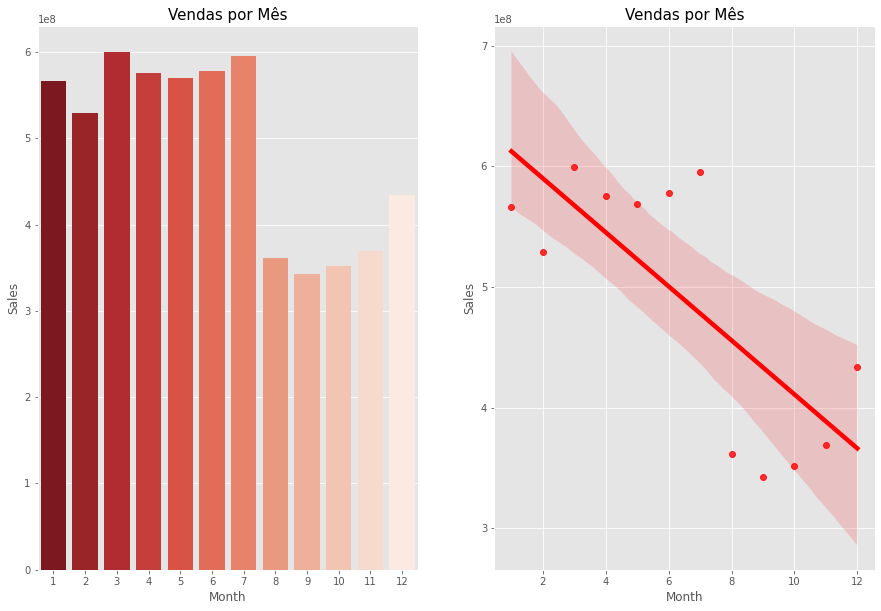

In [34]:
# Hipótese 3.

# Preparação dos dados.
aux1 = df1[['Month', 'Sales']].groupby('Month').sum().reset_index()

# Área de plotagem.
fig, (axis1, axis2) = plt.subplots(1, 2)

# Plotagem 1.
p1 = sns.barplot(x = 'Month', 
                 y = 'Sales', 
                 data = aux1, 
                 palette = 'Reds_r', 
                 ax = axis1)
p1.set_title('Vendas por Mês', size = 15);

# Plotagem 2.
p2 = sns.regplot(x = 'Month', 
                 y = 'Sales', 
                 data = aux1, 
                 color = 'r', 
                 ax = axis2)
p2.set_title('Vendas por Mês', size = 15);

Hipótese 3: 

- **H3.** As unidades deveriam vender mais no segundo semestre do ano.
    - Falso, fica claro a queda no número de vendas no segundo semestre do ano.

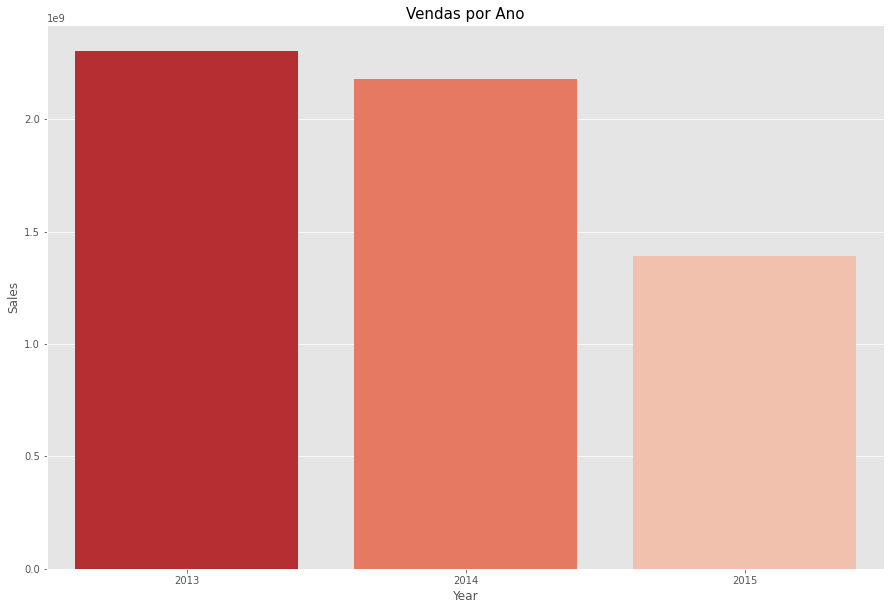

In [35]:
# Hipótese 4.

# Preparação dos dados.
aux1 = df1[['Year', 'Sales']].groupby('Year').sum().reset_index()

# Plotagem.
p1 = sns.barplot(x = 'Year', 
                 y = 'Sales', 
                 data = aux1, 
                 palette = 'Reds_r')
p1.set_title('Vendas por Ano', size = 15);

Hipótese 4:

- **H4.** As unidades deveriam vender mais ao longo dos anos.
    - Falso, vemos claramente uma queda no número de vendas ao longo dos anos.
    
Para responder a hipótese 5 teremos que comparar duas variáveis: **`Promo`** e **`Promo2`**

In [36]:
# Vendas por tipo de promoção.
df1[['Promo', 'Promo2', 'Sales']].groupby(['Promo', 'Promo2']).sum().sort_values('Sales').reset_index()

,Promo,Promo2,Sales
0,0,1,1289362241
1,1,1,1472275754
2,0,0,1482612096
3,1,0,1628930532


As unidades que participaram da promoção estendida venderam menos do que as que participaram apenas da promoção normal.

E ao longo do tempo? Será que esse comportamento se alterou?

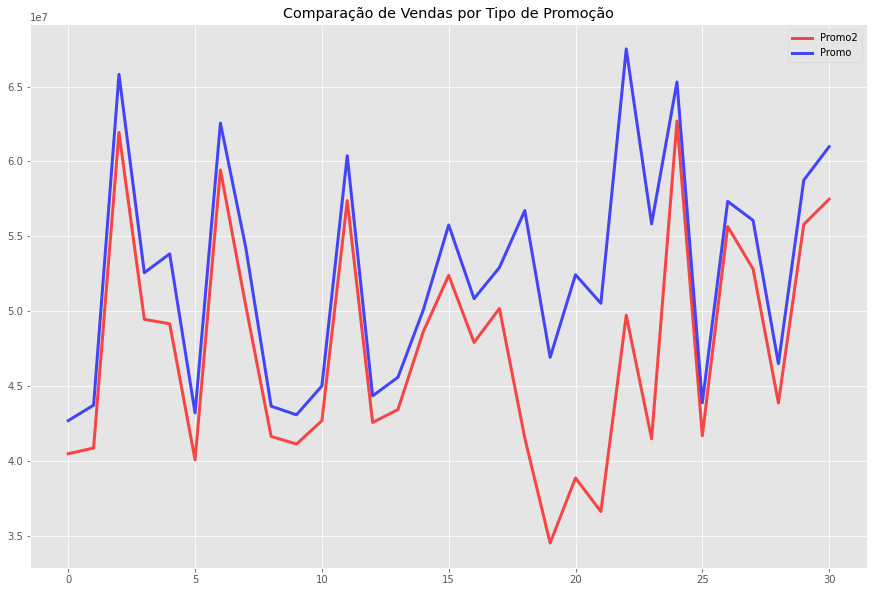

In [37]:
# Hipótese 5.

# Unidades que aderiram as duas promoções.
aux1 = df1[(df1['Promo'] == 1) & (df1['Promo2'] == 1)][['YearMonth', 'Sales']].groupby('YearMonth').sum().reset_index()
ax = aux1.plot(title = 'Comparação de Vendas por Tipo de Promoção', color = 'red', alpha = 0.7)

# Unidades que aderiram somente a promoção normal.
aux2 = df1[(df1['Promo'] == 1) & (df1['Promo2'] == 0)][['YearMonth', 'Sales']].groupby('YearMonth').sum().reset_index()
aux2.plot(color = 'blue', alpha = 0.7, ax = ax)

ax.legend(labels = ['Promo2', 'Promo']);

Hipótese 5:

- **H5.** As unidades com promoções estendidas deveriam vender mais.
    - Falso, conforme vemos na plotagem acima, as unidades com promoções estendidas vendem menos.
    
Para a hipótese 6 utilizaremos a variável **`StateHoliday`**. 

Vamos converter as classes dessa variável para facilitar o entendimento.

In [38]:
# Convertendo as classes.
df1['StateHoliday'] = df1['StateHoliday'].apply(lambda x: 'public_holiday' if x == 'a' else
                                                'easter_holiday' if x == 'b' else 
                                                'christmas' if x == 'c' else 'regular_day')

In [39]:
# Contagem de registros.
df1[['StateHoliday']].value_counts()

StateHoliday  
regular_day       843428
public_holiday       694
easter_holiday       145
christmas             71
dtype: int64

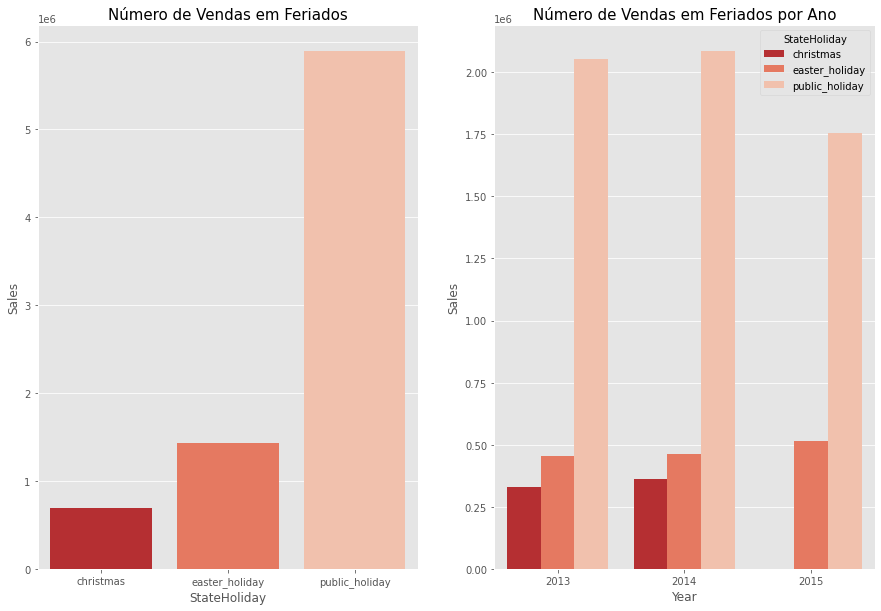

In [40]:
# Hipótese 6.

# Preparando os dados.
aux = df1[df1['StateHoliday'] != 'regular_day']

# Plotagem 1.
plt.subplot(1, 2, 1)
aux1 = aux[['StateHoliday', 'Sales']].groupby('StateHoliday').sum().reset_index()
p1 = sns.barplot(x = 'StateHoliday', 
                 y = 'Sales', 
                 palette = 'Reds_r', 
                 data = aux1)
p1.set_title('Número de Vendas em Feriados', size = 15);

# Plotagem 2
plt.subplot(1, 2, 2)
aux2 = aux[['Year', 'StateHoliday', 'Sales']].groupby(['Year', 'StateHoliday']).sum().reset_index()
p2 = sns.barplot(x = 'Year', 
                 y = 'Sales', 
                 hue = 'StateHoliday', 
                 palette = 'Reds_r', 
                 data = aux2)
p2.set_title('Número de Vendas em Feriados por Ano', size = 15);

Hipótese 6:

- **H6.** As unidades abertas durante o feriado de natal deveriam vender mais.
    - Falso, conforme vemos, unidades abertas durante o feriado de natal vendem menos.

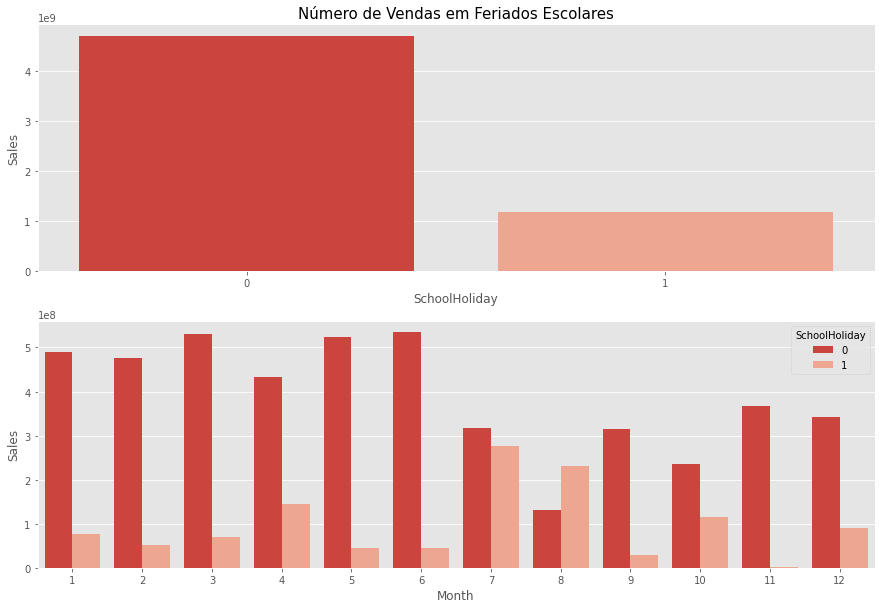

In [41]:
# Hipótese 7.

# Plotagem 1.
plt.subplot(2, 1, 1)
aux1 = df1[['SchoolHoliday', 'Sales']].groupby('SchoolHoliday').sum().reset_index()
p1 = sns.barplot(x = 'SchoolHoliday',
                 y = 'Sales', 
                 palette = 'Reds_r', 
                 data = aux1)
p1.set_title('Número de Vendas em Feriados Escolares', size = 15);

# Plotagem 2.
plt.subplot(2, 1, 2)
aux2 = df1[['Month', 'SchoolHoliday', 'Sales']].groupby(['Month', 'SchoolHoliday']).sum().reset_index()
p2 = sns.barplot(x = 'Month', 
                 y = 'Sales', 
                 hue = 'SchoolHoliday',
                 palette = 'Reds_r', 
                 data = aux2);

Hipótese 7:

- **H7.** As unidades deveriam vender menos durante os feriados escolares.
    - Verdadeiro, conforme vemos, as unidades vendem menos durante os feriados escolares, com exceção no mês de agosto.

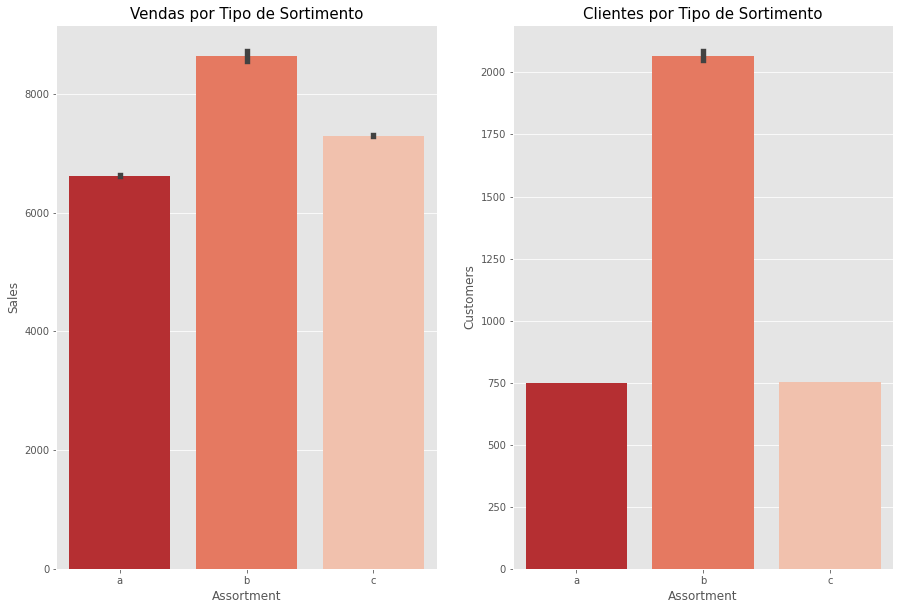

In [42]:
# Hipótese 8.

# Área de plotagem.
fig, (axis1, axis2) = plt.subplots(1, 2)

# Plotagem 1.
p1 = sns.barplot(x = 'Assortment', 
                 y = 'Sales', 
                 data = df1, 
                 order = ['a', 'b', 'c'], 
                 palette = 'Reds_r', 
                 ax = axis1)
p1.set_title('Vendas por Tipo de Sortimento', size = 15);

# Plotagem 2.
p2 = sns.barplot(x = 'Assortment', 
                 y = 'Customers', 
                 data = df1, 
                 order = ['a', 'b', 'c'], 
                 palette = 'Reds_r', 
                 ax = axis2)
p2.set_title('Clientes por Tipo de Sortimento', size = 15);

Hipótese 8: 

- **H8.** As unidades com maior sortimento de produtos deveriam vender mais.
    - Falso, vemos na plotagem acima, que o sortimento *b* é o que possui o maior número de vendas.  
    
Para a hipótese 9, utilizaremos a variável **`CompetitionDistance`**, que indica a distância em metros do concorrente mais próximo das unidades. 

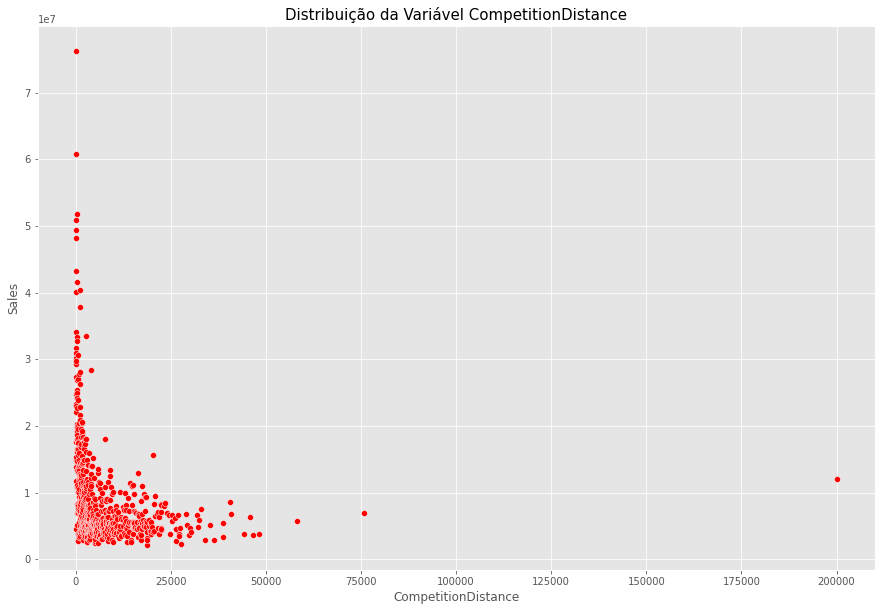

In [43]:
# Distribuição da variável.

# Preparação dos dados.
aux1 = df1[['CompetitionDistance', 'Sales']].groupby('CompetitionDistance').sum().reset_index()

# Plotagem.
p1 = sns.scatterplot(x = 'CompetitionDistance', 
                     y = 'Sales', 
                     data = aux1, 
                     color = 'r')
p1.set_title('Distribuição da Variável CompetitionDistance', size = 15);

- A medida que a distância da concorrência aumenta, as vendas das unidades da Rossmann diminuem. 

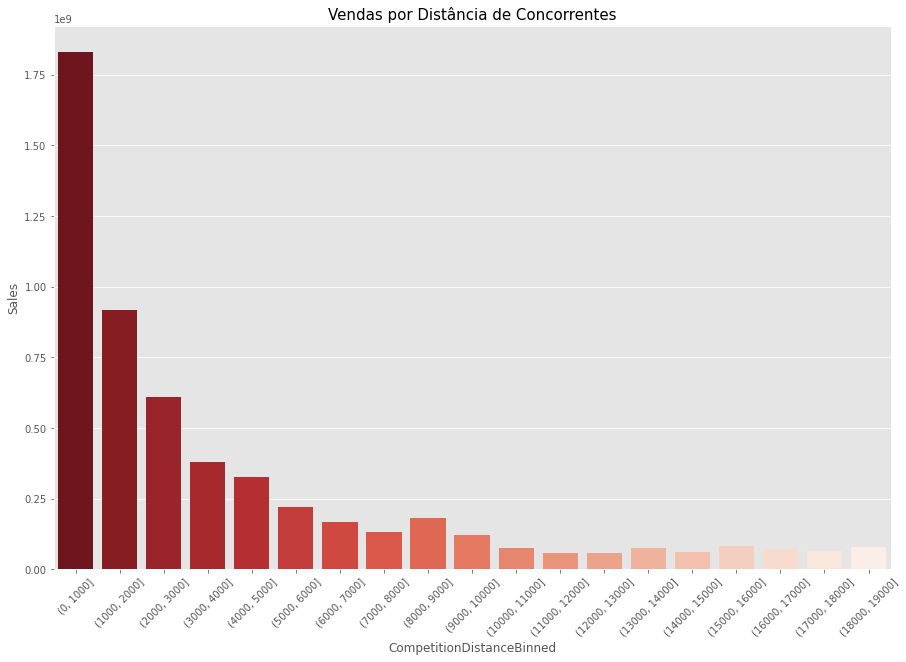

In [44]:
# Hipótese 9.

# Range para as distâncias.
bins = list(np.arange(0, 20000, 1000))
aux1['CompetitionDistanceBinned'] = pd.cut(aux1['CompetitionDistance'], bins = bins)

# Preparação dos dados.
aux2 = aux1[['CompetitionDistanceBinned', 'Sales']].groupby('CompetitionDistanceBinned').sum().reset_index()

# Plotagem.
p1 = sns.barplot(x = 'CompetitionDistanceBinned', 
                 y = 'Sales', 
                 palette = 'Reds_r', 
                 data = aux2)
p1.set_title('Vendas por Distância de Concorrentes', size = 15)
plt.xticks(rotation = 45);

Hipótese 9:

- **H9.** As unidades com concorrentes mais próximos deveriam vender menos.
    - Falso, unidades com concorrentes mais próximos vendem mais.
    
Para a hipótese 10, precisaremos das variáveis **`CompetitionOpenSinceMonth`** e **`CompetitionOpenSinceYear`**. 

Como ambas contém dados referentes a mesma informação podemos juntá-las em apenas uma variável.

In [45]:
# Nova variável.

# Convertendo as variáveis.
df1['CompetitionOpenSinceYear'] = df1['CompetitionOpenSinceYear'].astype('int64')
df1['CompetitionOpenSinceMonth'] = df1['CompetitionOpenSinceMonth'].astype('int64')

# Concatenando os dados.
df1['CompetitionSince'] = df1.apply(lambda x: datetime.datetime(year = x['CompetitionOpenSinceYear'],
                                                                month = x['CompetitionOpenSinceMonth'], 
                                                                day = 1), axis = 1)

Agora, podemos subtrair essas datas da variável **`Date`**, o que nos dará a quantidade de meses desde que a concorrência inaugurou a unidade mais próxima. Iremos armazenar essa informação em uma nova variável.

In [46]:
# Nova variável.
df1['CompetitionTimeMonth'] = ((df1['Date'] - df1['CompetitionSince']) / 30).apply(lambda x: x.days).astype('int64')

In [47]:
# Visualizando a transformação.
df1[['CompetitionOpenSinceMonth', 
     'CompetitionOpenSinceYear', 
     'CompetitionSince']].head()

,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,CompetitionSince
0,9,2008,2008-09-01
1,11,2007,2007-11-01
2,12,2006,2006-12-01
3,9,2009,2009-09-01
4,4,2015,2015-04-01


In [48]:
# Visualizando a transformação.
df1[['CompetitionOpenSinceMonth', 
     'CompetitionOpenSinceYear', 
     'CompetitionSince', 
     'CompetitionTimeMonth']].head()

,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,CompetitionSince,CompetitionTimeMonth
0,9,2008,2008-09-01,84
1,11,2007,2007-11-01,94
2,12,2006,2006-12-01,105
3,9,2009,2009-09-01,71
4,4,2015,2015-04-01,4


Podemos excluir as variáveis derivadas.

In [49]:
# Excluindo as variáveis.
df1 = df1.drop(['CompetitionOpenSinceMonth', 
                'CompetitionOpenSinceYear', 
                'CompetitionSince'], axis = 1)

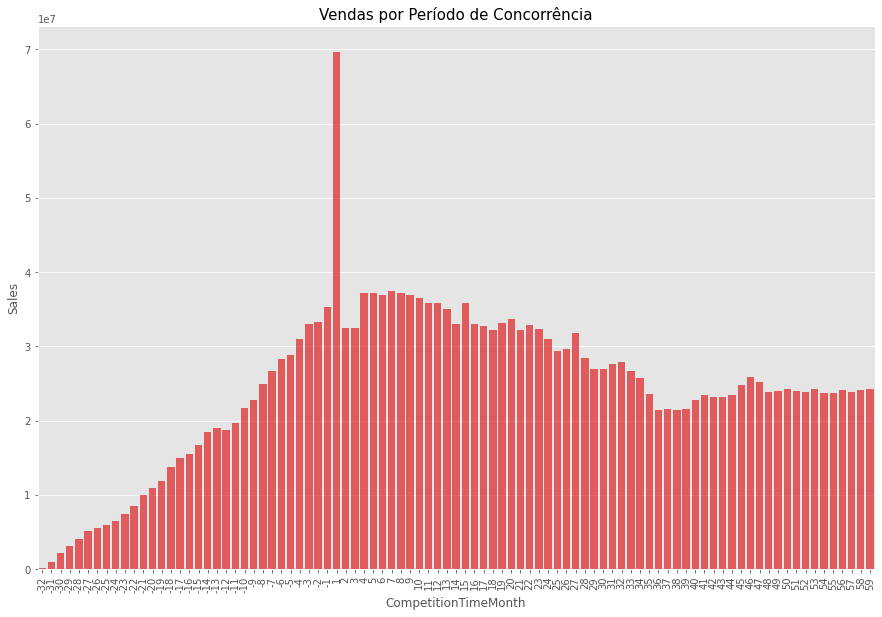

In [50]:
# Hipótese 10.

# Preparando os dados.
aux1 = df1[['CompetitionTimeMonth', 'Sales']].groupby('CompetitionTimeMonth').sum().reset_index()

# Filtro para diminuir a granularidade.
aux2 = aux1[(aux1['CompetitionTimeMonth'] < 60) & (aux1['CompetitionTimeMonth'] != 0)]

# Plotagem.
p1 = sns.barplot(x = 'CompetitionTimeMonth', 
                 y = 'Sales', 
                 color = 'r', 
                 alpha = 0.7, 
                 data = aux2)
p1.set_title('Vendas por Período de Concorrência', size = 15)
plt.xticks(rotation = 90);

Os números negativos representam as unidades concorrentes que foram inauguradas antes dos registros contidos no dataset.

Notamos que o volume de vendas aumenta quando mais próximo de zero, ou seja, quanto mais recente é a chegada da concorrência, maiores são as vendas.

Portanto, para a hipótese 10: 

- **H10.** As unidades com concorrentes à mais tempo deveriam vendem mais.
    - Falso, unidades com concorrentes à mais tempo vendem menos.
    
Precisaremos realizar algumas manipulações nos dados para responder a última hipótese do negócio.

Criaremos a variável **`PromoSince`**, concatenando as informações das variáveis **`Promo2SinceYear`** e
**`Promo2SinceWeek`**.

In [51]:
# Nova variável.

# Convertendo as variáveis.
df1['Promo2SinceWeek'] = df1['Promo2SinceWeek'].astype('int64')
df1['Promo2SinceYear'] = df1['Promo2SinceYear'].astype('int64')

# Concatenando os dados.
df1['PromoSince'] = df1['Promo2SinceYear'].astype(str) + '-' + df1['Promo2SinceWeek'].astype(str)

In [52]:
# Visualizando a transformação.
df1[['Promo2SinceWeek', 
     'Promo2SinceYear', 
     'PromoSince']].head()

,Promo2SinceWeek,Promo2SinceYear,PromoSince
0,31,2015,2015-31
1,13,2010,2010-13
2,14,2011,2011-14
3,31,2015,2015-31
4,31,2015,2015-31


Agora, a variável possui o ano e a semana em que a unidade começou a participar da **`Promo2`**.

Porém, podemos realizar uma operação para conseguirmos uma data com mais informações.

In [53]:
# Formatando a variável.
df1['PromoSince'] = df1['PromoSince'].apply(lambda x:
                                            datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days = 7))

In [54]:
# Visualizando a variável.
df1[['PromoSince']].head()

,PromoSince
0,2015-07-27
1,2010-03-22
2,2011-03-28
3,2015-07-27
4,2015-07-27


Com isso, podemos realizar o mesmo procedimento de subtração que realizamos com a variável anterior, e assim, teremos a quantidade de semanas desde que a unidade participa da promoção.

Iremos armazenar essa informação em uma nova variável.

In [55]:
# Nova variável.
df1['PromoTimeWeek'] = ((df1['Date'] - df1['PromoSince']) / 7).apply(lambda x: x.days).astype('int64')

In [56]:
# Visualizando as variáveis.
df1[['Promo2',
     'Promo2SinceWeek', 
     'Promo2SinceYear', 
     'PromoSince', 
     'PromoTimeWeek']].head()

,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoSince,PromoTimeWeek
0,0,31,2015,2015-07-27,0
1,1,13,2010,2010-03-22,279
2,1,14,2011,2011-03-28,226
3,0,31,2015,2015-07-27,0
4,0,31,2015,2015-07-27,0


Assim como fizemos anteriormente, podemos excluir as variáveis derivadas.

In [57]:
# Excluindo as variáveis.
df1 = df1.drop(['Promo2SinceYear', 
                'Promo2SinceWeek', 
                'PromoSince'], axis = 1)

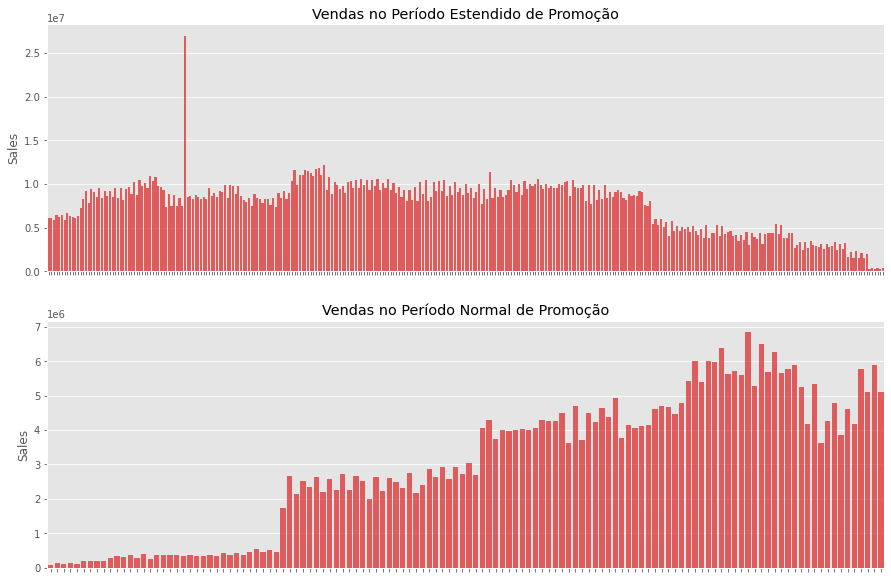

In [58]:
# Hipótese 11.

# Preparando os dados.
aux1 = df1[['PromoTimeWeek', 'Sales']].groupby('PromoTimeWeek').sum().reset_index()

# Plotagem 1.
plt.subplot(2, 1, 1)
aux2 = aux1[aux1['PromoTimeWeek'] > 0] 
p1 = sns.barplot(x = 'PromoTimeWeek', 
                 y = 'Sales', 
                 color = 'r', 
                 alpha = 0.7, 
                 data = aux2)
p1.set(xlabel = ''), 
p1.set_xticklabels(''), 
p1.set_title('Vendas no Período Estendido de Promoção');

# Plotagem 2.
plt.subplot(2, 1, 2)
aux3 = aux1[aux1['PromoTimeWeek'] < 0]
p2 = sns.barplot(x = 'PromoTimeWeek', 
                 y = 'Sales', 
                 color = 'r', 
                 alpha = 0.7, 
                 data = aux3)
p2.set(xlabel = ''), 
p2.set_xticklabels(''), 
p2.set_title('Vendas no Período Normal de Promoção');

Com isso, podemos responder a última hipótese do negócio: 

- **H11.** As unidades com promoções ativas por mais tempo deveriam vender mais.
    - Falso, unidades com promoções ativas por mais tempo vendem menos.
    
Respondemos todas as hipóteses criadas:

- **H1** - Verdadeiro

- **H2** - Verdadeiro

- **H3** - Falso

- **H4** - Falso

- **H5** - Falso

- **H6** - Falso

- **H7** - Verdadeiro

- **H8** - Falso

- **H9** - Falso

- **H10** - Falso

- **H11** - Falso

Assim, finalizamos a etapa de análise exploratória.

## 3. Engenharia de Atributos

A etapa de engenharia de atributos foi constituída na criação de algumas variáveis que foram utilizadas para responder as hipóteses de negócio, são elas:

- **`Day`**, **`Month`**, **`Year`**, **`WeekDay`**, **`WeekYear`**, **`YearMonth`**: extraídas da variável **`Date`**.
- **`CompetitionTimeMonth`**: extraída da **`CompetitionOpenSinceMonth`** e **`CompetitionOpenSinceYear`**.
- **`PromoTimeWeek`**: extraída da **`Promo2SinceWeek`** e **`Promo2SinceYear`**.

## 4. Pré-Processamento dos Dados

Mais detalhes das principais técnicas utilizadas nessa fase podem ser encontrados  <a href='https://medium.com/@rafaelfelippe_/pr%C3%A9-processamento-de-dados-com-python-d2c607d134f'>neste link</a> em meu blog de estudos.


Antes de partimos para a preparação dos dados de fato, vamos realizar alguns testes para verificarmos a correlação entre as variáveis.

### 4.1 Análise de Correlação

#### 4.1.1 Análise de Correlação (Variáveis Numéricas)

In [59]:
# Redefinindo as variáveis numéricas.
nums2 = ['Sales', 
         'Customers', 
         'CompetitionDistance', 
         'CompetitionTimeMonth', 
         'PromoTimeWeek']

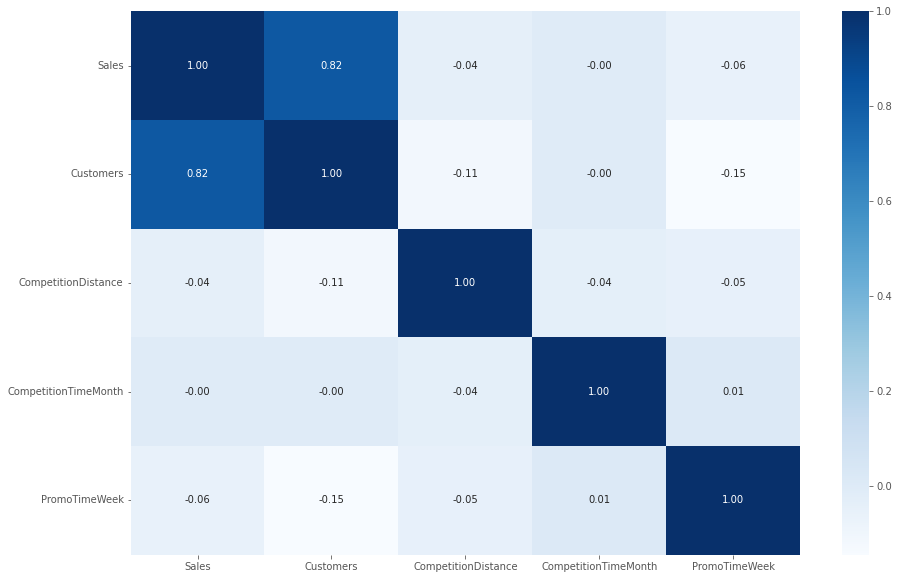

In [60]:
# Matriz de correlação.
corr_df = df1[nums2].corr()

# Plotagem.
sns.heatmap(corr_df, 
            cmap = 'Blues', 
            annot = True, 
            fmt = '.2f');

- **`Customers`** possui alta correlação positiva com a variável **`Sales`**.

Sendo assim, iremos excluir essa variável para evitar problemas de multicolinearidade.

In [61]:
# Excluindo a variável.
df1 = df1.drop(['Customers'], axis = 1)

#### 4.1.2 Análise de Correlação (Variáveis Categóricas)

Para a correlação de variáveis categóricas, usaremos o método de *Cramer V*.

Assim como a correlação de *Pearson*, esse método também mede a associação entre duas variáveis, retornando um valor entre 0 e 1.

Um valor de 0 indica que não existe uma associação, e um valor de 1 indica que há uma associação muito forte entre as variáveis.

Para realizar o cálculo desse método, precisaremos converter os dados das variáveis para números.

In [62]:
# Redefinindo as variáveis categóricas.
cats2 = ['Promo', 
        'StateHoliday', 
        'SchoolHoliday', 
        'StoreType', 
        'Assortment', 
        'Promo2']

In [63]:
# Instanciando o objeto para conversão.
le = LabelEncoder()

In [64]:
# Aplicando a transformação.
df1[cats2] = df1[cats2].apply(lambda x: le.fit_transform(x))

In [65]:
# Visualizando a transformação.
df1[cats2].head()

,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,Promo2
0,1,3,1,2,0,0
1,1,3,1,0,0,1
2,1,3,1,0,0,1
3,1,3,1,2,2,0
4,1,3,1,0,0,0


Para o cálculo do *Cramer V* usaremos a função *corr_matrix* do pacote *PyCorr*.

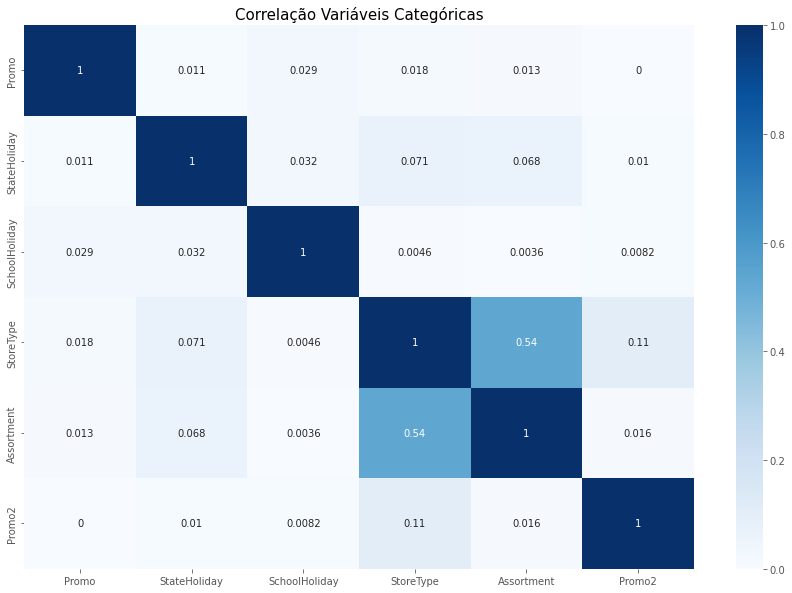

In [66]:
# Correlação Cramer V.
correlation_matrix = corr_matrix(df1, ['Promo', 
                                       'StateHoliday', 
                                       'SchoolHoliday', 
                                       'StoreType', 
                                       'Assortment', 
                                       'Promo2'])

# Plotagem.
p1 = sns.heatmap(correlation_matrix, 
                 annot = True, 
                 cmap = 'Blues')
p1.set_title('Correlação Variáveis Categóricas', size = 15);

Não temos correlações significantes entre as variáveis categóricas. 

### 4.2 Redimensionamento das Variáveis

#### 4.2.1 Redimensionando Variáveis com Escalas Distintas

Para realizar o redimensionamento, vamos selecionar apenas as variáveis que possuem escalas muito distintas, são elas:

- **`CompetitionDistance`**.
- **`Year`**.
- **`CompetitionTimeMonth`**.
- **`PromoTimeWeek`**.

É interessante analisar a distribuição dessas variáveis para sabermos quais técnicas de redimensionamento podemos utilizar.

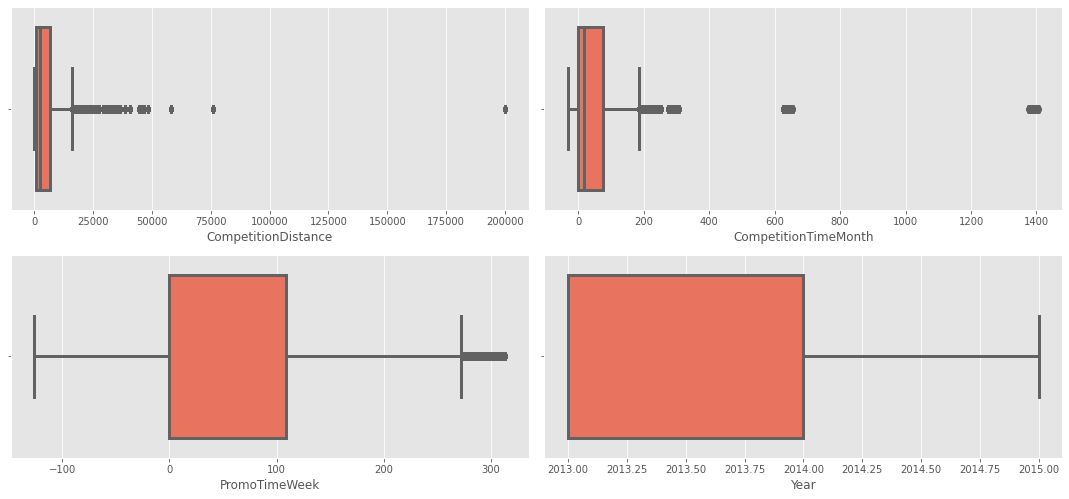

In [67]:
# Boxplots das variáveis.

# CompetitionDistance.
plt.subplot(3, 2, 1)
p1 = sns.boxplot(df1['CompetitionDistance'], 
                 color = 'tomato');

# CompetitionTimeMonth.
plt.subplot(3, 2, 2)
p2 = sns.boxplot(df1['CompetitionTimeMonth'], 
                 color = 'tomato');

# PromoTimeWeek.
plt.subplot(3, 2, 3)
p3 = sns.boxplot(df1['PromoTimeWeek'], 
                 color = 'tomato');

# Year.
plt.subplot(3, 2, 4)
p4 = sns.boxplot(df1['Year'], 
                 color = 'tomato');

plt.tight_layout()
plt.show()

As variáveis **`CompetitionDistance`** e **`CompetitionTimeMonth`** possuem alguns *outliers* que teremos que tratá-los. 

Para o redimensionamento dessas variáveis, utilizaremos a classe *RobustScaler()*.

Já para as variáveis **`PromoTimeWeek`** e **`Year`**, iremos utilizar a classe *MinMaxScaler()*.

In [68]:
# Instanciando os objetos.
rs = RobustScaler() 
mms = MinMaxScaler() 

In [69]:
# Variáveis antes da transformação.
df1[['CompetitionDistance', 
     'CompetitionTimeMonth', 
     'PromoTimeWeek', 
     'Year']].head()

,CompetitionDistance,CompetitionTimeMonth,PromoTimeWeek,Year
0,1270.0,84,0,2015
1,570.0,94,279,2015
2,14130.0,105,226,2015
3,620.0,71,0,2015
4,29910.0,4,0,2015


In [70]:
# Redimensionando as variáveis com outliers.

# CompetitionDistance.
df1['CompetitionDistance'] = rs.fit_transform(df1[['CompetitionDistance']].values)

# CompetitionTimeMonth.
df1['CompetitionTimeMonth'] = rs.fit_transform(df1[['CompetitionTimeMonth']].values)

In [71]:
# Redimensionando as variáveis sem outliers.

# PromoTimeWeek.
df1['PromoTimeWeek'] = mms.fit_transform(df1[['PromoTimeWeek']].values)

# Year.
df1['Year'] = mms.fit_transform(df1[['Year']].values)

In [72]:
# Variáveis após a transformação.
df1[['CompetitionDistance', 
     'CompetitionTimeMonth', 
     'PromoTimeWeek', 
     'Year']].head()

,CompetitionDistance,CompetitionTimeMonth,PromoTimeWeek,Year
0,-0.170968,0.918919,0.287016,1.0
1,-0.283871,1.054054,0.922551,1.0
2,1.903226,1.202703,0.801822,1.0
3,-0.275806,0.743243,0.287016,1.0
4,4.448387,-0.162162,0.287016,1.0


#### 4.2.2 Redimensionando a Variável Target

Para a variável target, iremos aplicar a transformação logarítmica. 

Essa transformação é frequentemente usada quando a variável em questão possui um viés, ou seja, uma das extremidades elevadas e uma longa cauda. 

A aplicação da transformação logarítmica pode reduzir o efeito desse viés.

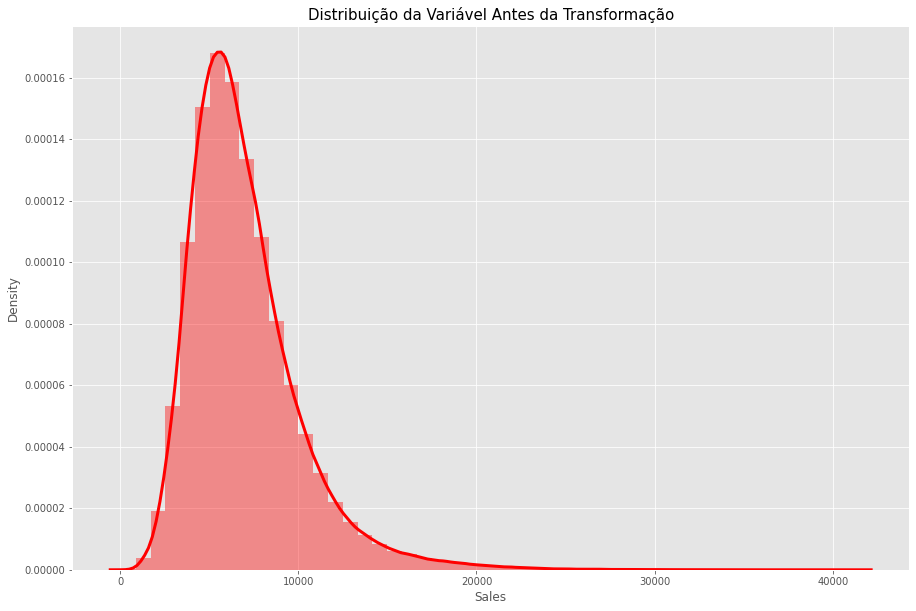

In [73]:
# Distribuição da variável.

# Plotagem.
p = sns.distplot(df1['Sales'], 
                 color = 'r')
p.set_title('Distribuição da Variável Antes da Transformação', size = 15);

In [74]:
# Transformação logarítmica.
df1['Sales'] = np.log1p(df1['Sales'])

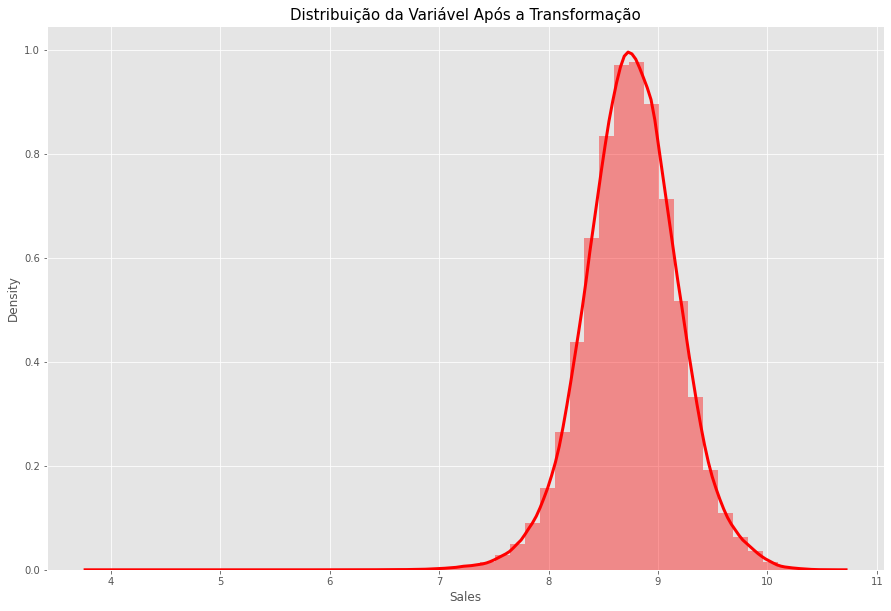

In [75]:
# Distribuição da variável após o redimensionamento.

# PLotagem.
p1 = sns.distplot(df1['Sales'], 
                  color = 'r')
p1.set_title('Distribuição da Variável Após a Transformação', size = 15);

#### 4.2.3 Redimensionando Variáveis Períodicas

Para as variáveis que representam informações períodicas, iremos extrair o seno e o cosseno de cada uma delas.

In [76]:
# Variáveis antes da transformação.
df1[['Day', 
     'Month', 
     'WeekDay', 
     'WeekYear']].head()

,Day,Month,WeekDay,WeekYear
0,31,7,4,31
1,31,7,4,31
2,31,7,4,31
3,31,7,4,31
4,31,7,4,31


In [77]:
# Redimensionamento das variáveis períodicas.

# Day.
df1['DaySin'] = df1['Day'].apply(lambda x: np.sin(x * (2 * np.pi/30)))
df1['DayCos'] = df1['Day'].apply(lambda x: np.cos(x * (2 * np.pi/30)))

# Month.
df1['MonthSin'] = df1['Month'].apply(lambda x: np.sin(x * (2 * np.pi/12)))
df1['MonthCos'] = df1['Month'].apply(lambda x: np.cos(x * (2 * np.pi/12)))

# WeekDay.
df1['WeekDaySin'] = df1['WeekDay'].apply(lambda x: np.sin(x * (2 * np.pi/7)))
df1['WeekDayCos'] = df1['WeekDay'].apply(lambda x: np.cos(x * (2 * np.pi/7)))

# WeekYear.
df1['WeekYearSin'] = df1['WeekYear'].apply(lambda x: np.sin(x * (2 * np.pi/52)))
df1['WeekYearCos'] = df1['WeekYear'].apply(lambda x: np.cos(x * (2 * np.pi/52)))

Com as novas variáveis, podemos remover as variáveis derivadas e também a **`YearMonth`** que representa a mesma informação.

In [78]:
# Excluíndo as variáveis.
cols_drop = ['Day', 
             'Month', 
             'WeekDay', 
             'WeekYear', 
             'YearMonth']
df1 = df1.drop(cols_drop, axis = 1)

In [79]:
# Informações sobre o dataframe.
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Store                 844338 non-null  int64         
 1   Date                  844338 non-null  datetime64[ns]
 2   Sales                 844338 non-null  float64       
 3   Promo                 844338 non-null  int64         
 4   StateHoliday          844338 non-null  int32         
 5   SchoolHoliday         844338 non-null  int64         
 6   StoreType             844338 non-null  int32         
 7   Assortment            844338 non-null  int32         
 8   CompetitionDistance   844338 non-null  float64       
 9   Promo2                844338 non-null  int64         
 10  Year                  844338 non-null  float64       
 11  CompetitionTimeMonth  844338 non-null  float64       
 12  PromoTimeWeek         844338 non-null  float64       
 13

### 4.3 Seleção das Variáveis

#### 4.3.1 Divisão Treino e Teste

Por se tratar de um problema temporal, os dados não podem ser divididos aleatoriamente.

Como queremos ter a previsão de vendas das próximas 6 semanas, vamos selecionar as últimas 6 semanas de vendas e alocá-las para dados de teste. 

O restante antes disso, será os dados de treino.

In [80]:
# Data máxima do dataset.
df1[['Date']].max()

Date   2015-07-31
dtype: datetime64[ns]

O último registro do dataset tem a data de "2015-07-31".

Com essa informação, podemos realizar uma operação de subtração para encontrar a data referente às últimas 6 semanas.

In [81]:
# Data para divisão dos dados.
df1[['Store', 'Date']].groupby('Store').max().reset_index()['Date'][0] - datetime.timedelta(days = 6 * 7)

Timestamp('2015-06-19 00:00:00')

In [82]:
# Dados de treino.
X_train = df1[df1['Date'] < '2015-06-19']
y_train = X_train['Sales']

print('Data início: {}'.format(X_train['Date'].min()))
print('Data final: {}'.format(X_train['Date'].max()))

Data início: 2013-01-01 00:00:00
Data final: 2015-06-18 00:00:00


In [83]:
# Dados de teste.
X_test = df1[df1['Date'] >= '2015-06-19']
y_test = X_test['Sales']

print('Data início: {}'.format(X_test['Date'].min()))
print('Data final: {}'.format(X_test['Date'].max()))

Data início: 2015-06-19 00:00:00
Data final: 2015-07-31 00:00:00


Realizamos a primeira separação dos conjuntos. 

Porém, observe que a variável target ainda está presente em ambos os conjuntos, vamos descartá-la.

Para a seleção das variáveis, devemos ter apenas variáveis numéricas, sendo assim, excluíremos também a variável **`Date`**.

In [84]:
# Excluíndo as variáveis.
X_train_2 = X_train.drop(['Sales', 'Date'], axis = 1)
X_test_2 = X_test.drop(['Sales', 'Date'], axis = 1)

#### 4.3.2 Seleção de Variáveis (Feature Selection)

Agora, para realizar a seleção de variáveis, iremos separar os dados em arrays.

Vamos utilizar os conjuntos que possuem apenas variáveis numéricas.

In [85]:
# Separando as variáveis.
X = X_train_2.values
y = X_train['Sales'].values
print(X.shape, y.shape)

(802942, 19) (802942,)


Utilizaremos a classe *SelectKBest()*, onde *K* representa o número máximo de variáveis que desejamos ter na etapa de treinamento. 

Importante ressaltar que não existe uma melhor maneira de se escolher o valor ideal para *K*, a solução é tentar com diferentes valores e compararmos os resultados.

Aqui, iniciaremos definindo *K = 15*. 

In [86]:
# Instanciando o objeto.
selector = SelectKBest(score_func = f_regression, k = 15)

In [87]:
# Treinando o objeto.
bestFeatuesSKB = selector.fit_transform(X, y)

In [88]:
# Melhores variáveis.
bfSkb = X_train_2.columns[selector.get_support()]
bfSkb

Index(['Promo', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'Promo2', 'Year', 'PromoTimeWeek', 'DaySin',
       'DayCos', 'MonthSin', 'MonthCos', 'WeekDaySin', 'WeekDayCos',
       'WeekYearCos'],
      dtype='object')

Vamos ordenar as variáveis de acordo com o *score* obtido para verificarmos o nível de importância de cada uma delas.

In [89]:
# Score das variáveis.
scores = pd.Series(selector.scores_, index = X_train_2.columns)
scores = scores[selector.get_support()]
scores = scores.sort_values(ascending = False)
scores

Promo                  155489.603874
Assortment              11534.214087
Promo2                  11123.513621
WeekDayCos               9374.377834
WeekDaySin               7360.133043
DayCos                   4679.657391
DaySin                   2273.465042
Year                     1911.438473
CompetitionDistance      1545.793879
PromoTimeWeek            1542.658416
SchoolHoliday            1125.107885
StoreType                 331.857841
WeekYearCos               105.110149
MonthSin                   86.955932
MonthCos                   85.252383
dtype: float64

Vamos criar novos conjuntos de treino e teste contendo essas variáveis.

Também iremos acrescentar a variável **`Store`**.

In [90]:
# Adicionando a variável.
bfSkb = list(bfSkb)
bfSkb.extend(['Store'])

In [91]:
# Novos conjuntos de treino.
X_train_3 = X_train_2[bfSkb]
y_train = y_train
print(X_train_3.shape, y_train.shape)

(802942, 16) (802942,)


In [92]:
# Novos conjuntos de teste.
X_test_3 = X_test_2[bfSkb]
y_test = y_test
print(X_test_3.shape, y_test.shape)

(41396, 16) (41396,)


Finalizamos essa etapa com 3 conjuntos de dados: 

- X_train, X_test     = Contém todas as variáveis.
- X_train_2, X_test_2 = Contém todas as variáveis, exceto **`Sales`** e **`Date`**.
- X_train_3, X_test_3 = Contém as variáveis selecionadas pelo *SelectKBest()*.

## 5. Modelagem Preditiva

Nessa etapa, iremos avaliar alguns dos principais algoritmos para problemas de regressão, são eles: 

- <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html'>LinearRegression</a>

- <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html'>LinearRegression (Lasso)</a>

- <a href='https://scikitlearn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html'>RandomForestRegressor</a>

### 5.1 Definindo Funções Auxiliares

In [93]:
# Definindo funções auxiliares.

# Cálculo do erro do modelo.
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

# MAPE (Erro Percentual Absoluto Médio).
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

# Métricas do modelo.
def ml_error(model_name, y, y_pred):
    
    mae  = mean_absolute_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    return pd.DataFrame({
        'Modelo': model_name,
        'MAE': mae,
        'MAPE': mape,
        'RMSE': rmse}, index = [0])

Além das três funções criadas acima, vamos definir também nossa própria função de validação cruzada para séries temporais.

In [94]:
# Função de para validação cruzada.
def cross_validation(x_training, kfold, model_name, model, verbose = False):
    
    mae_list  = []
    mape_list = []
    rmse_list = []
    
    for k in reversed(range(1, kfold + 1)):
        if verbose:
            print('\nValor de "K": {}'.format(k))
            
        # Data de início e término para validação.
        validation_start_date = x_training['Date'].max() - datetime.timedelta(days = k * 6 * 7)
        validation_end_date = x_training['Date'].max() - datetime.timedelta(days = (k - 1) * 6 * 7)
        
        # Filtrando os dados.
        training = x_training[x_training['Date'] < validation_start_date]
        validation = x_training[(x_training['Date'] >= validation_start_date) & (x_training['Date'] <= validation_end_date)]
        
        # Definindo os dados de treino e teste.
        # Dados de treino.
        xtraining = training.drop(['Date', 'Sales'], axis = 1)
        ytraining = training['Sales']
        
        # Dados de teste.
        xvalidation = validation.drop(['Date', 'Sales'], axis = 1)
        yvalidation = validation['Sales']
        
        # Treinamento do modelo.
        m = model.fit(xtraining, ytraining)
        
        # Previsões do modelo.
        y_pred = m.predict(xvalidation)
        
        # Avaliação do modelo.
        m_result = ml_error(model_name, np.expm1(yvalidation), np.expm1(y_pred))
                
        # Desempenho do modelo.
        mae_list.append(m_result['MAE']) 
        mape_list.append(m_result['MAPE'])
        rmse_list.append(m_result['RMSE'])
        
    return pd.DataFrame({'Model Name': model_name,
                         'MAE CV': np.round(np.mean(mae_list), 2).astype(str) + ' +/- ' + np.round(np.std(mae_list), 2).astype(str),
                         'MAPE CV': np.round(np.mean(mape_list), 2).astype(str) + ' +/- ' + np.round(np.std(mape_list), 2).astype(str),
                         'RMSE CV': np.round(np.mean(rmse_list), 2).astype(str) + ' +/- ' + np.round(np.std(rmse_list), 2).astype(str)}, index = [0])

Para a validação cruzada em séries temporais, precisamos de um conjunto de dados que tenha as variáveis **`Sales`** e **`Date`**.

Sendo assim, iremos criar o quarto grupo de dados. 

- X_train_4, X_test_4 = Contém as variáveis selecionadas pelo *SelectKBest()* mais as variáveis **`Sales`** e **`Date`**.

In [95]:
# Conjunto de dados para validação cruzada.

# Lista das melhores variáveis.
best_vars = list(bfSkb)
best_vars.extend(['Sales', 'Date'])

# Criando os conjuntos.
X_train_4 = X_train[best_vars]
X_test_4 = X_test[best_vars]

Iremos utilizar os conjuntos X_train_3 e X_test_3 para treinar e testar os modelos.

Para a validação cruzada, utilizaremos o conjunto X_train_4.

### 5.2 Regressão Linear

Vamos começar a etapa de modelagem, com um dos algoritmos mais famosos para problemas de regressão: *LinearRegression*.

Se desejar saber mais detalhes sobre o funcionamento desse algortimo acesse <a href='https://medium.com/@rafaelfelippe_/regress%C3%A3o-linear-linear-regression-5037a496a49f'>este link</a> em meu blog de estudos.

Nesse momento, vamos utilizar o algoritmo com sua configuração padrão.

In [96]:
# Instanciando e treinando o modelo.
lr = LinearRegression().fit(X_train_3, y_train)

Com o modelo treinado, podemos utilizar o conjunto de teste para realizar as previsões.

In [97]:
# Previsões com dados de teste.
y_pred = lr.predict(X_test_3)

In [98]:
# Desempenho do modelo.
lr_result = ml_error('Linear Regression', np.expm1(y_test), np.expm1(y_pred))
lr_result

,Modelo,MAE,MAPE,RMSE
0,Linear Regression,1873.854367,28.914407,2702.565526


Acima, temos as três métricas de avalição.

Para nosso problema de negócio, ela pode ser interpretada da seguinte forma:

- **MAE**: o modelo apresenta em média um valor de erro de 1873 dólares.

- **MAPE**: para cada valor predito do modelo, ele pode subestimar ou superestimar o resultado em 28%.

- **RMSE**: apresenta um erro médio de 2702 unidades.

Agora, vamos utilizar a função *cross_validation* que criamos anteriormente para verificarmos o desempenho do modelo com diferentes *folds* de dados.

In [99]:
# Validação cruzada.
lr_result_cv = cross_validation(X_train_4, 5, 'Linear Regression', lr, verbose = False)
lr_result_cv

,Model Name,MAE CV,MAPE CV,RMSE CV
0,Linear Regression,2108.99 +/- 335.01,29.82 +/- 1.86,3013.54 +/- 519.62


Conseguimos um desempenho similar na validação cruzada.

Agora, vejamos se conseguimos melhorar a performance das previsões utilizando outros algoritmos.

### 5.3 Regressão Linear Lasso

A Regressão Lasso também é outro modelo linear derivado da Regressão Linear, porém agora, iremos utilizar o método *L1* de regularização..

Além de diminuir a variância do modelo, essa regularização tem uma outra importante aplicação em Machine Learning. 

Quando há múltiplas *features* altamente correlacionadas, a regularização *Lasso* seleciona apenas uma dessas *features* e zera os coeficientes das outras, de forma a minimizar a penalização *L1*. 

Desse modo, dizemos que esse modelo realiza *feature selection* automaticamente, gerando vários coeficientes com peso zero, ou seja, que são ignorados pelo modelo. Isso facilita a interpretação do modelo, o que é uma enorme vantagem.

In [100]:
# Instanciando e treinando o modelo.
lrr = Lasso(alpha = 0.01).fit(X_train_3, y_train)

In [101]:
# Previsões com dados de teste.
y_pred_2 = lrr.predict(X_test_3)

In [102]:
# Desempenho do modelo.
lrr_result = ml_error('Linear Regression - Lasso', np.expm1(y_test), np.expm1(y_pred_2))
lrr_result

,Modelo,MAE,MAPE,RMSE
0,Linear Regression - Lasso,1899.604403,28.803252,2766.601292


In [103]:
# Validação cruzada.
lrr_result_cv = cross_validation(X_train_4, 5, 'Linear Regression - Lasso', lrr, verbose = False)
lrr_result_cv

,Model Name,MAE CV,MAPE CV,RMSE CV
0,Linear Regression - Lasso,2130.05 +/- 367.59,29.56 +/- 1.25,3066.85 +/- 548.48


Aparentemente, a utilização dessa regularização não causou mudanças significativas no desempenho do modelo.

A seguir, tentaremos um algoritmo mais poderoso. 

### 5.4 RandomForestRegressor

Iremos realizar o mesmo procedimento feito anteriormente: instanciar o modelo, treiná-lo e aplicar a validação cruzada.

In [104]:
# Instanciando e treinando o modelo.
rf = RandomForestRegressor().fit(X_train_3, y_train)

In [105]:
# Previsões com dados de teste.
y_pred_3 = rf.predict(X_test_3)

In [106]:
# Desempenho do modelo.
rf_result = ml_error('Random Forest Regressor', np.expm1(y_test), np.expm1(y_pred_3))
rf_result

,Modelo,MAE,MAPE,RMSE
0,Random Forest Regressor,703.166658,10.448423,1057.511623


Conseguimos um resultado bem melhor do que o obtido com a regressão linear, vejamos como o modelo se sai na validação cruzada.

In [107]:
# Validação cruzada.
rf_result_cv = cross_validation(X_train_4, 5, 'Random Forest Regressor', rf, verbose = True)
rf_result_cv


Valor de "K": 5

Valor de "K": 4

Valor de "K": 3

Valor de "K": 2

Valor de "K": 1


,Model Name,MAE CV,MAPE CV,RMSE CV
0,Random Forest Regressor,853.93 +/- 215.32,11.79 +/- 2.09,1275.95 +/- 318.39


Após a validação, temos as métricas de desempenho:

- **MAE**: o modelo apresenta em média um valor de erro de 853,93 dólares.

- **MAPE**: para cada valor predito do modelo, ele pode subestimar ou superestimar o resultado em 11,7%.

- **RMSE**: apresenta um erro médio de 1275 unidades.

## 6. Avaliação dos Modelos

Como vimos, utilizamos a técnica de *Time Series Cross-Validation* para cada modelo, avaliando o Erro Médio Absoluto (MAE), o Erro Médio Absoluto Porcentagem (MAPE) e o Erro Quadrático Médio Raiz (RMSE).

A performance real dos modelos é dada pela média dos erros +/- o desvio padrão do erro.

In [108]:
# Performance nos treinamentos.
modelling_results = pd.concat([lr_result, lrr_result, rf_result])
modelling_results.sort_values('RMSE')

,Modelo,MAE,MAPE,RMSE
0,Random Forest Regressor,703.166658,10.448423,1057.511623
0,Linear Regression,1873.854367,28.914407,2702.565526
0,Linear Regression - Lasso,1899.604403,28.803252,2766.601292


In [109]:
# Performance na validação cruzada.
modelling_results_cv = pd.concat([lr_result_cv, lrr_result_cv, rf_result_cv])
modelling_results_cv.sort_values('RMSE CV')

,Model Name,MAE CV,MAPE CV,RMSE CV
0,Random Forest Regressor,853.93 +/- 215.32,11.79 +/- 2.09,1275.95 +/- 318.39
0,Linear Regression,2108.99 +/- 335.01,29.82 +/- 1.86,3013.54 +/- 519.62
0,Linear Regression - Lasso,2130.05 +/- 367.59,29.56 +/- 1.25,3066.85 +/- 548.48


O modelo *RandomForestRegressor* foi o que apresentou o melhor desempenho.

Para um segundo ciclo do projeto, poderíamos realizar a otimização dos hiperparâmetros do modelo, escolher outro conjunto de variáveis e também testar outros algoritmos de regressão que geralmente performam muito bem, como o *XGBoostRegressor*, por exemplo.

Porém, aqui, concluímos que o modelo com *RandomForestRegressor* teve um desempenho satisfatório.

Com o modelo definido, vamos extrair mais algumas informações relevantes em relação ao seu desempenho.

Para isso, precisamos "despadronizar" os dados.

In [110]:
# Retornando a escala original dos dados.
X_test_4['Sales'] = np.expm1(X_test_4['Sales'])

# Coluna de previsões.
X_test_4['Predictions'] = np.expm1(y_pred_3)

In [111]:
# Visualizando as variáveis.
X_test_4[['Sales', 'Predictions']].head()

,Sales,Predictions
0,5263.0,5791.855084
1,6064.0,6616.948777
2,8314.0,9808.373460
3,13995.0,12358.177275
4,4822.0,5248.572991


A coluna *Predictions* contém as previsões de vendas para cada unidade da drogaria.

Essa poderia ser uma forma simples e eficiente de entregar o resultado para a Rossmann.

Agora, vamos criar novas colunas contendo o pior e o melhor cenário das previsões para cada unidade. 

In [112]:
# Preparando os dados.
df_pred = X_test_4[['Store', 'Predictions']].groupby('Store').sum().reset_index()

In [113]:
# Obtendo as métricas.

# MAE.
df_aux1 = X_test_4[['Store', 'Sales', 'Predictions']].groupby('Store').apply(lambda x: mean_absolute_error(x['Sales'],
                                                                                                           x['Predictions'])).reset_index().rename(columns = {0: 'MAE'})

# MAPE.
df_aux2 = X_test_4[['Store', 'Sales', 'Predictions']].groupby('Store').apply(lambda x: mean_absolute_percentage_error(x['Sales'],
                                                                                                                      x['Predictions'])).reset_index().rename(columns = {0: 'MAPE'})

In [114]:
# Concatenando as informações.
df_aux3 = pd.merge(df_aux1, df_aux2, how = 'inner', on = 'Store')
df_pred = pd.merge(df_pred, df_aux3, how = 'inner', on = 'Store')

In [115]:
# Visualizando o dataframe.
df_pred.head()

,Store,Predictions,MAE,MAPE
0,1,166466.142614,307.181903,7.092150
1,2,181892.863581,404.846592,7.826186
2,3,270689.620994,738.906066,10.387578
3,4,351070.810984,790.775769,7.620088
4,5,169510.582504,323.060667,7.749904


In [116]:
# Piores e melhores cenários.
df_pred['WorstScenario'] = df_pred['Predictions'] - df_pred['MAE']
df_pred['BestScenario'] = df_pred['Predictions'] + df_pred['MAE']

# Organizando as colunas.
df_pred = df_pred[['Store', 'Predictions', 'WorstScenario', 'BestScenario', 'MAE', 'MAPE']]

# Piores previsões.
df_pred.sort_values('MAPE', ascending = False).head()

,Store,Predictions,WorstScenario,BestScenario,MAE,MAPE
291,292,108878.734004,105304.354179,112453.113829,3574.379825,61.177781
908,909,241195.877992,234076.658129,248315.097854,7119.219863,47.888047
97,98,287731.446548,285537.346737,289925.546358,2194.099811,39.782809
549,550,254211.706753,252539.849813,255883.563692,1671.856939,32.778700
875,876,215233.619121,211290.772982,219176.465260,3942.846139,30.804722


A tabela acima mostra as piores previsões, mostrando que algumas unidades são mais desafiadoras de se prever.

No entanto, as unidades que apresentaram grandes erros no resultado das previsões são minorias, podendo ser identificadas como os pontos discrepantes no gráfico abaixo:

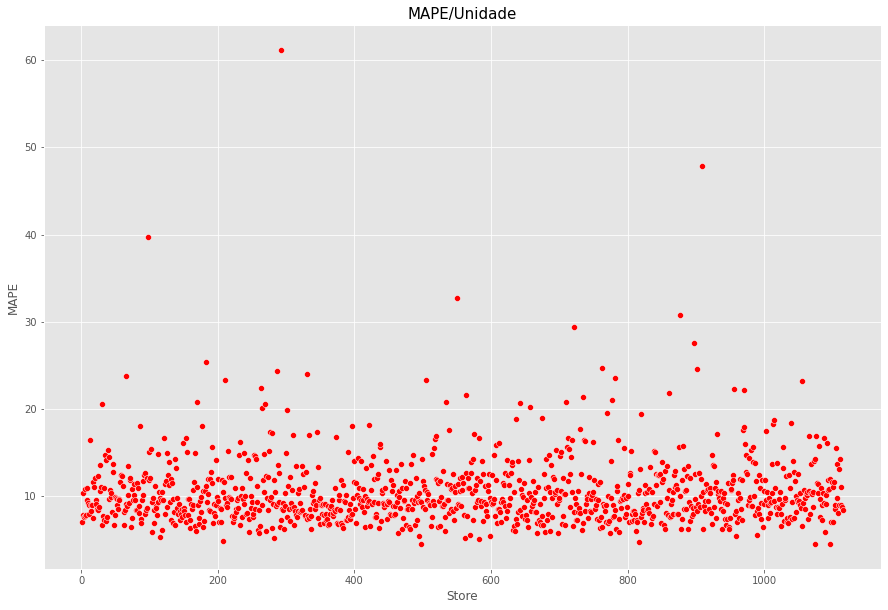

In [117]:
# MAPE de cada unidade.

# Plotagem.
p1 = sns.scatterplot(x = 'Store', 
                     y = 'MAPE', 
                     color = 'r', 
                     data = df_pred)
p1.set_title('MAPE/Unidade', size = 15);

Por fim, a tabela abaixo mostra a soma de todas as unidades, bem como os piores e melhores cenários.

In [118]:
# Tabela com resultados somados.
df_pred2 = df_pred[['Predictions', 'WorstScenario', 'BestScenario']].apply(lambda x: np.sum(x), axis = 0).reset_index().rename(columns = {'index': 'scenario', 0: 'values'})
df_pred2['values'] = df_pred2['values'].map('${:,.2f}'.format)
df_pred2

,scenario,values
0,Predictions,"$291,674,544.87"
1,WorstScenario,"$290,886,094.90"
2,BestScenario,"$292,462,994.83"


In [119]:
# Taxa de erros do modelo.
X_test_4['Error'] = X_test_4['Sales'] - X_test_4['Predictions']
X_test_4['ErrorRate'] = X_test_4['Predictions'] / X_test_4['Sales']

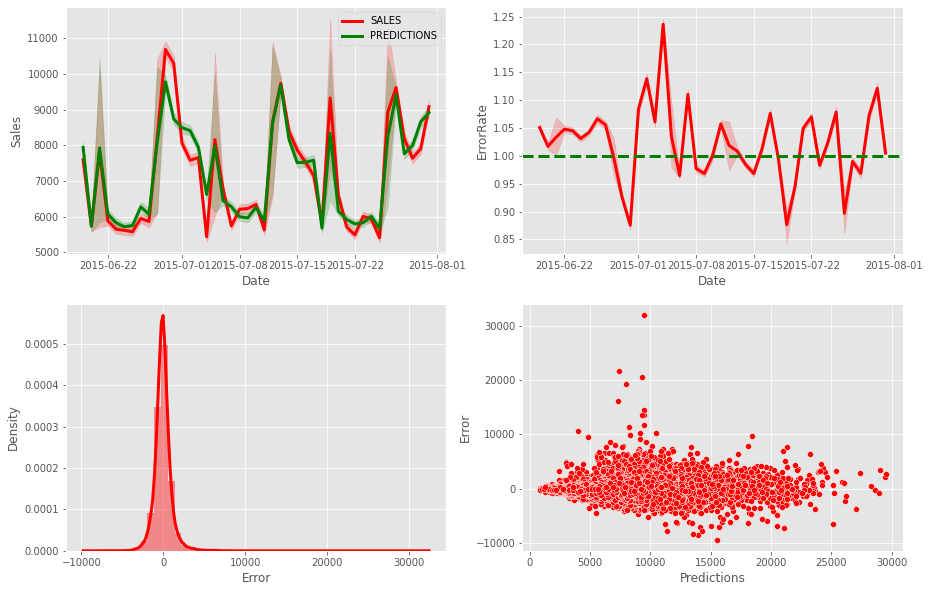

In [120]:
# Resultado do modelo.

# Plotagem 1.
plt.subplot(2, 2, 1)
sns.lineplot(x = 'Date', y = 'Sales', color = 'r', data = X_test_4, label = 'SALES')
sns.lineplot(x = 'Date', y = 'Predictions', color = 'g', data = X_test_4, label = 'PREDICTIONS')

# Plotagem 2.
plt.subplot(2, 2, 2)
sns.lineplot(x = 'Date', y = 'ErrorRate', color = 'r', data = X_test_4)
plt.axhline(1, linestyle = '--', color = 'g')

# Plotagem 3.
plt.subplot(2, 2, 3)
sns.distplot(X_test_4['Error'], color = 'r')

# Plotagem 4.
plt.subplot(2, 2, 4)
sns.scatterplot(X_test_4['Predictions'], X_test_4['Error'], color = 'r');

As plotagens acima, confirmam o bom desempenho do modelo: 

- Na primeira plotagem podemos ver a linha de previsões bem próxima dos valores reais. 
- Na plotagem 2, podemos ver a taxa de erro ao decorrer do tempo.
- No plot 3, temos um gráfico de densidade do erro. 
- Na última plotagem temos o gráfico de distribuição das previsões por erro.

Com isso, finalizamos a etapa de modelagem e avaliação do modelo.

## 7. Conclusões Finais

Finalmente, está na hora de nossas considerações finais.

Durante a fase de modelagem preditiva, testamos três algoritmos, sendo que a RandomForestRegressor obtive o melhor desempenho e foi escolhido para a entrega final. 

Em termos de negócio, as métricas representam:

- MAE: o modelo apresenta em média um valor de erro de 853,93 dólares.

- MAPE: para cada valor predito do modelo, ele pode subestimar ou superestimar o resultado em 11,7%.

- RMSE: apresenta um erro médio de 1275 unidades.

Como dito anteriormente, para um segundo ciclo do projeto, poderíamos testar outros algoritmos de regressão, e também testar outros conjuntos de features para o treinamento. 

Para a entrega do modelo ao cliente, poderíamos: 

- Publicar o modelo em nuvem e entregá-lo como uma API.

- Alimentar uma aplicação web para que o cliente consiga utilizar o modelo da forma mais simples possível.

- Salvar o modelo em disco e enviar para a equipe do cliente.

- Entregar o modelo como um *container Docker* que pode ser incorporado à infra do cliente.

- Entregar a equipe um *pipeline* de dados, passando por todas as fases, desde a coleta dos dados até as previsões do modelo.

A entrega do modelo deve ser definida no início do projeto. Algumas opções listadas acima, envolvem o trabalho de outras áreas, o que pode encarecer o projeto.

<a href='https://show.zohopublic.com/publish/8ulnq1503aa16c77f43a980e358d241332809'>Neste link</a>, há uma apresentação do projeto relatando as principais etapas abordadas, incluindo um exemplo de como poderia ser feito o deploy do modelo.